##### **This file intends to show some basic graphs for future analysis and better understanding of the dataset**
<span style="color: #FFB6C1;">please make sure you have started and selected the correct python interpreter (venv) before running this file <span>
- start your venv env using .\venv\Scripts\activate
- make sure you've installed all requirements.txt
- select correct env in the IDE (top right corner for VSC)
- if "venv" doesn not appear try selecting manually .\venv\Scripts\python.exe
- if it still does not work, try python -m ipykernel install --user --name venv --display-name "Python venv" and try repeating previous step

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import plotly.colors as pcolors
import plotly.io as pio
import seaborn as sns
import numpy as np
import datetime
import chardet

# Mon - Usual traffic
# Tue - Brute Force, FTP-Patator, SSH-Patator
# Wed - DoS/DDoS attacks
# Thu_1 (Morning) - Web attacks (SQL Injection, XSS, etc.)
# Thu_2 (Afternoon) - Infiltration, Meta Exploit
# Fri_1 (Morning) - Botnet
# Fri_2 (Afternoon) - PortScan
# Fri_3 (Afternoon) - DDoS LOIT (LOIC?)
'''
datasets = {
    "Mon": "../data/Monday-WorkingHours.pcap_ISCX.csv",
    "Tue": "../data/Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wed": "../data/Wednesday-workingHours.pcap_ISCX.csv",
    "Thu_1": "../data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thu_2": "../data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Fri_1": "../data/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Fri_2": "../data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Fri_3": "../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
}

datasets = {
    "Mon": "../data/Mon-Expanded.csv",
    "Tue": "../data/Tue-Expanded.csv",
    "Wed": "../data/Wed-Expanded.csv",
    "Thu_1": "../data/Thu_1-Expanded.csv",
    "Thu_2": "../data/Thu_2-Expanded.csv",
    "Fri_1": "../data/Fri_1-Expanded.csv",
    "Fri_2": "../data/Fri_2-Expanded.csv",
    "Fri_3": "../data/Fri_3-Expanded.csv"
}
'''

datasets = {
    "Mon": "../data/Mon-Expanded.csv",
    "Tue": "../data/Tue-Expanded.csv",
    "Wed": "../data/Wed-Expanded.csv",
    "Thu": "../data/Thu-Expanded.csv",
    "Fri": "../data/Fri-Expanded.csv"
}

full_dataset_path = "../data/Full-Expanded.csv"

def load_dataset(day, encoding="latin1"):
    df = pd.read_csv(datasets[day], encoding=encoding)
    df.columns = df.columns.str.strip()
    df = df.dropna()
    return df

def load_full_dataset(encoding="latin1"):
    df = pd.read_csv(full_dataset_path, encoding=encoding)
    df.columns = df.columns.str.strip()
    df = df.dropna()
    return df

def read_timestamp(timestamp_str) -> pd.Timestamp:
    return pd.to_datetime(timestamp_str, errors='coerce')

def convert_to_datetime(df, column='Timestamp'):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    return df


### **0. Dataset specification overview**

In [27]:
from enum import unique


df = pd.read_csv(datasets["Tue"])
df.columns = df.columns.str.strip()
df.info()

rows_count = df.shape[0]
clean_df = df.dropna()
print(f"Rows dropped {rows_count - clean_df.shape[0]}")
print(f"Rows after cleaning: {clean_df.shape[0]}")
print(clean_df['Label'].unique())
clean_df.head()

with open(datasets['Tue'], 'rb') as f:
    result = chardet.detect(f.read(100000))
    print(result)

print(clean_df.head())

print(type(df['Timestamp']))
print(df['Timestamp'].dtype)
print(dir(df['Timestamp']))
print(df['Timestamp'].head())

for dataset in datasets:
    df = load_dataset(dataset)
    unique_labels = df['Label'].unique()
    print(f"{dataset}: {unique_labels}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445708 entries, 0 to 445707
Data columns (total 90 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      445708 non-null  object 
 1   Source IP                    445708 non-null  object 
 2   Source Port                  445708 non-null  int64  
 3   Destination IP               445708 non-null  object 
 4   Destination Port             445708 non-null  int64  
 5   Protocol                     445708 non-null  int64  
 6   Timestamp                    445708 non-null  object 
 7   Flow Duration                445708 non-null  int64  
 8   Total Fwd Packets            445708 non-null  int64  
 9   Total Backward Packets       445708 non-null  int64  
 10  Total Length of Fwd Packets  445708 non-null  int64  
 11  Total Length of Bwd Packets  445708 non-null  float64
 12  Fwd Packet Length Max        445708 non-null  int64  
 13 

### **1. Dataset Overview**

#### 1.1


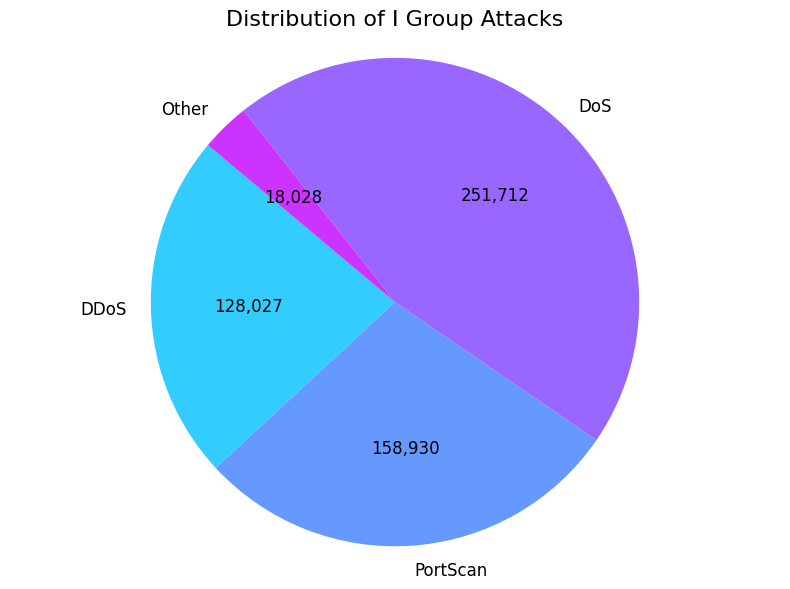

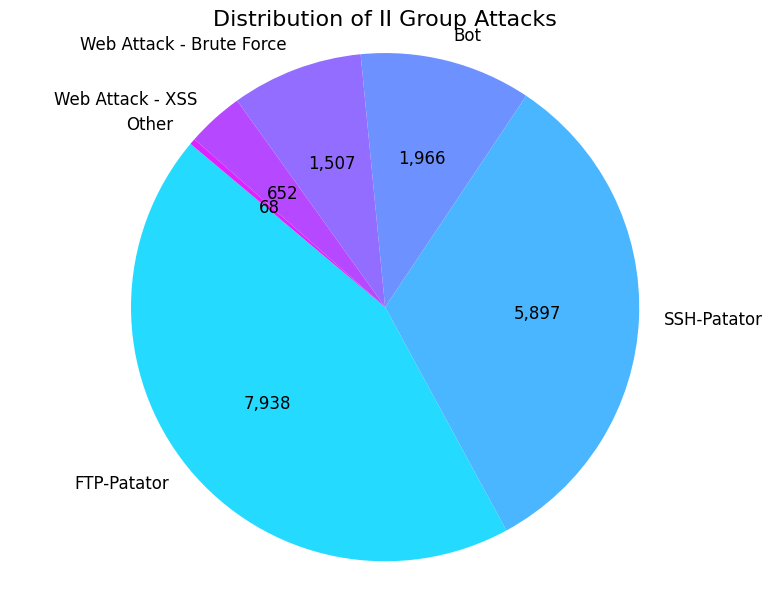

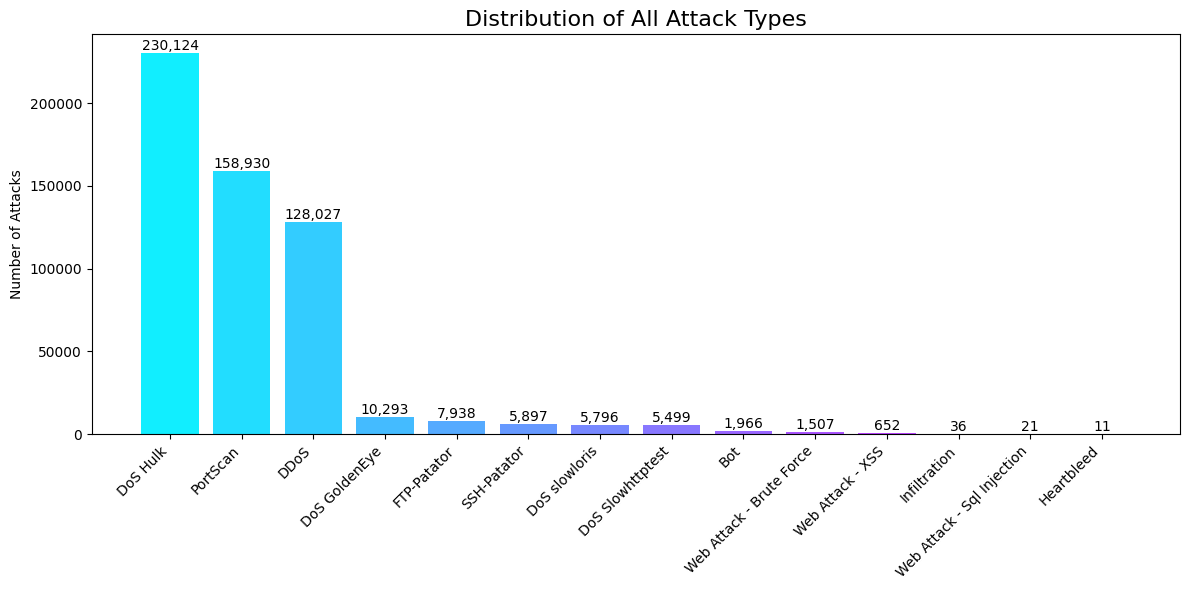

In [25]:
from collections import defaultdict

attack_counts = defaultdict(int)
dos_attacks = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest']
main_attacks = ['DDoS', 'PortScan', 'DoS']

for day, path in datasets.items():
    day_df = load_dataset(day)
    day_df.columns = day_df.columns.str.strip()
    clean_day_df = day_df.dropna()
    labels = clean_day_df['Label'].unique()
    for label in labels:
        if label != 'BENIGN':
            count = clean_day_df[clean_day_df['Label'] == label].shape[0]
            attack_counts[label] += count

sorted_attack_counts = dict()
for k in sorted(attack_counts, key=attack_counts.get, reverse=True):
    sorted_attack_counts[k] = attack_counts[k]

dos_total = 0
for dos_label in dos_attacks:
    dos_total += sorted_attack_counts.get(dos_label, 0)

main_counts = {
    'DDoS': sorted_attack_counts.get('DDoS', 0),
    'PortScan': sorted_attack_counts.get('PortScan', 0),
    'DoS': dos_total
}

rest_counts = {}
for k, v in sorted_attack_counts.items():
    if k not in main_attacks and k not in dos_attacks:
        rest_counts[k] = v
main_counts['Other'] = sum(rest_counts.values())

# Chart 1: Main attacks
plt.figure(figsize=(8, 6))
colors_main = sns.color_palette('cool', len(main_counts))
patches1, texts1, autotexts1 = plt.pie(
    list(main_counts.values()),
    labels=list(main_counts.keys()),
    autopct=lambda pct: f"{int(pct/100.*sum(main_counts.values())):,}",
    startangle=140,
    colors=colors_main,
    textprops={'fontsize': 12}
)
plt.title('Distribution of I Group Attacks', fontsize=16)
plt.axis('equal')
for autotext in autotexts1:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.show()


# Chart 2: Less prominent attacks
grouped_rest = {}
other_total = 0
for k, v in rest_counts.items():
    if v < 100:
        other_total += v
    else:
        grouped_rest[k] = v
if other_total > 0:
    grouped_rest['Other'] = other_total

plt.figure(figsize=(8, 6))
colors_rest = sns.color_palette('cool', len(grouped_rest))
patches2, texts2, autotexts2 = plt.pie(
    grouped_rest.values(),
    labels=grouped_rest.keys(),
    autopct=lambda pct: f"{int(pct/100.*sum(grouped_rest.values())):,}",
    startangle=140,
    colors=colors_rest,
    textprops={'fontsize': 12}
)
plt.title('Distribution of II Group Attacks', fontsize=16)
plt.axis('equal')
for autotext in autotexts2:
    autotext.set_color('black')
    autotext.set_fontsize(12)
plt.tight_layout()
plt.show()


# Chart 3: all attacks
plt.figure(figsize=(12, 6))
colors_all = sns.color_palette('cool', len(sorted_attack_counts))
bars = plt.bar(sorted_attack_counts.keys(), sorted_attack_counts.values(), color=colors_all)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Attacks')
plt.title('Distribution of All Attack Types', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()



#### 1.2

C:\Users\PanHe\AppData\Local\Temp\ipykernel_23608\2682345308.py:68: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
x:\IDS-project\IDS-Analyzer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


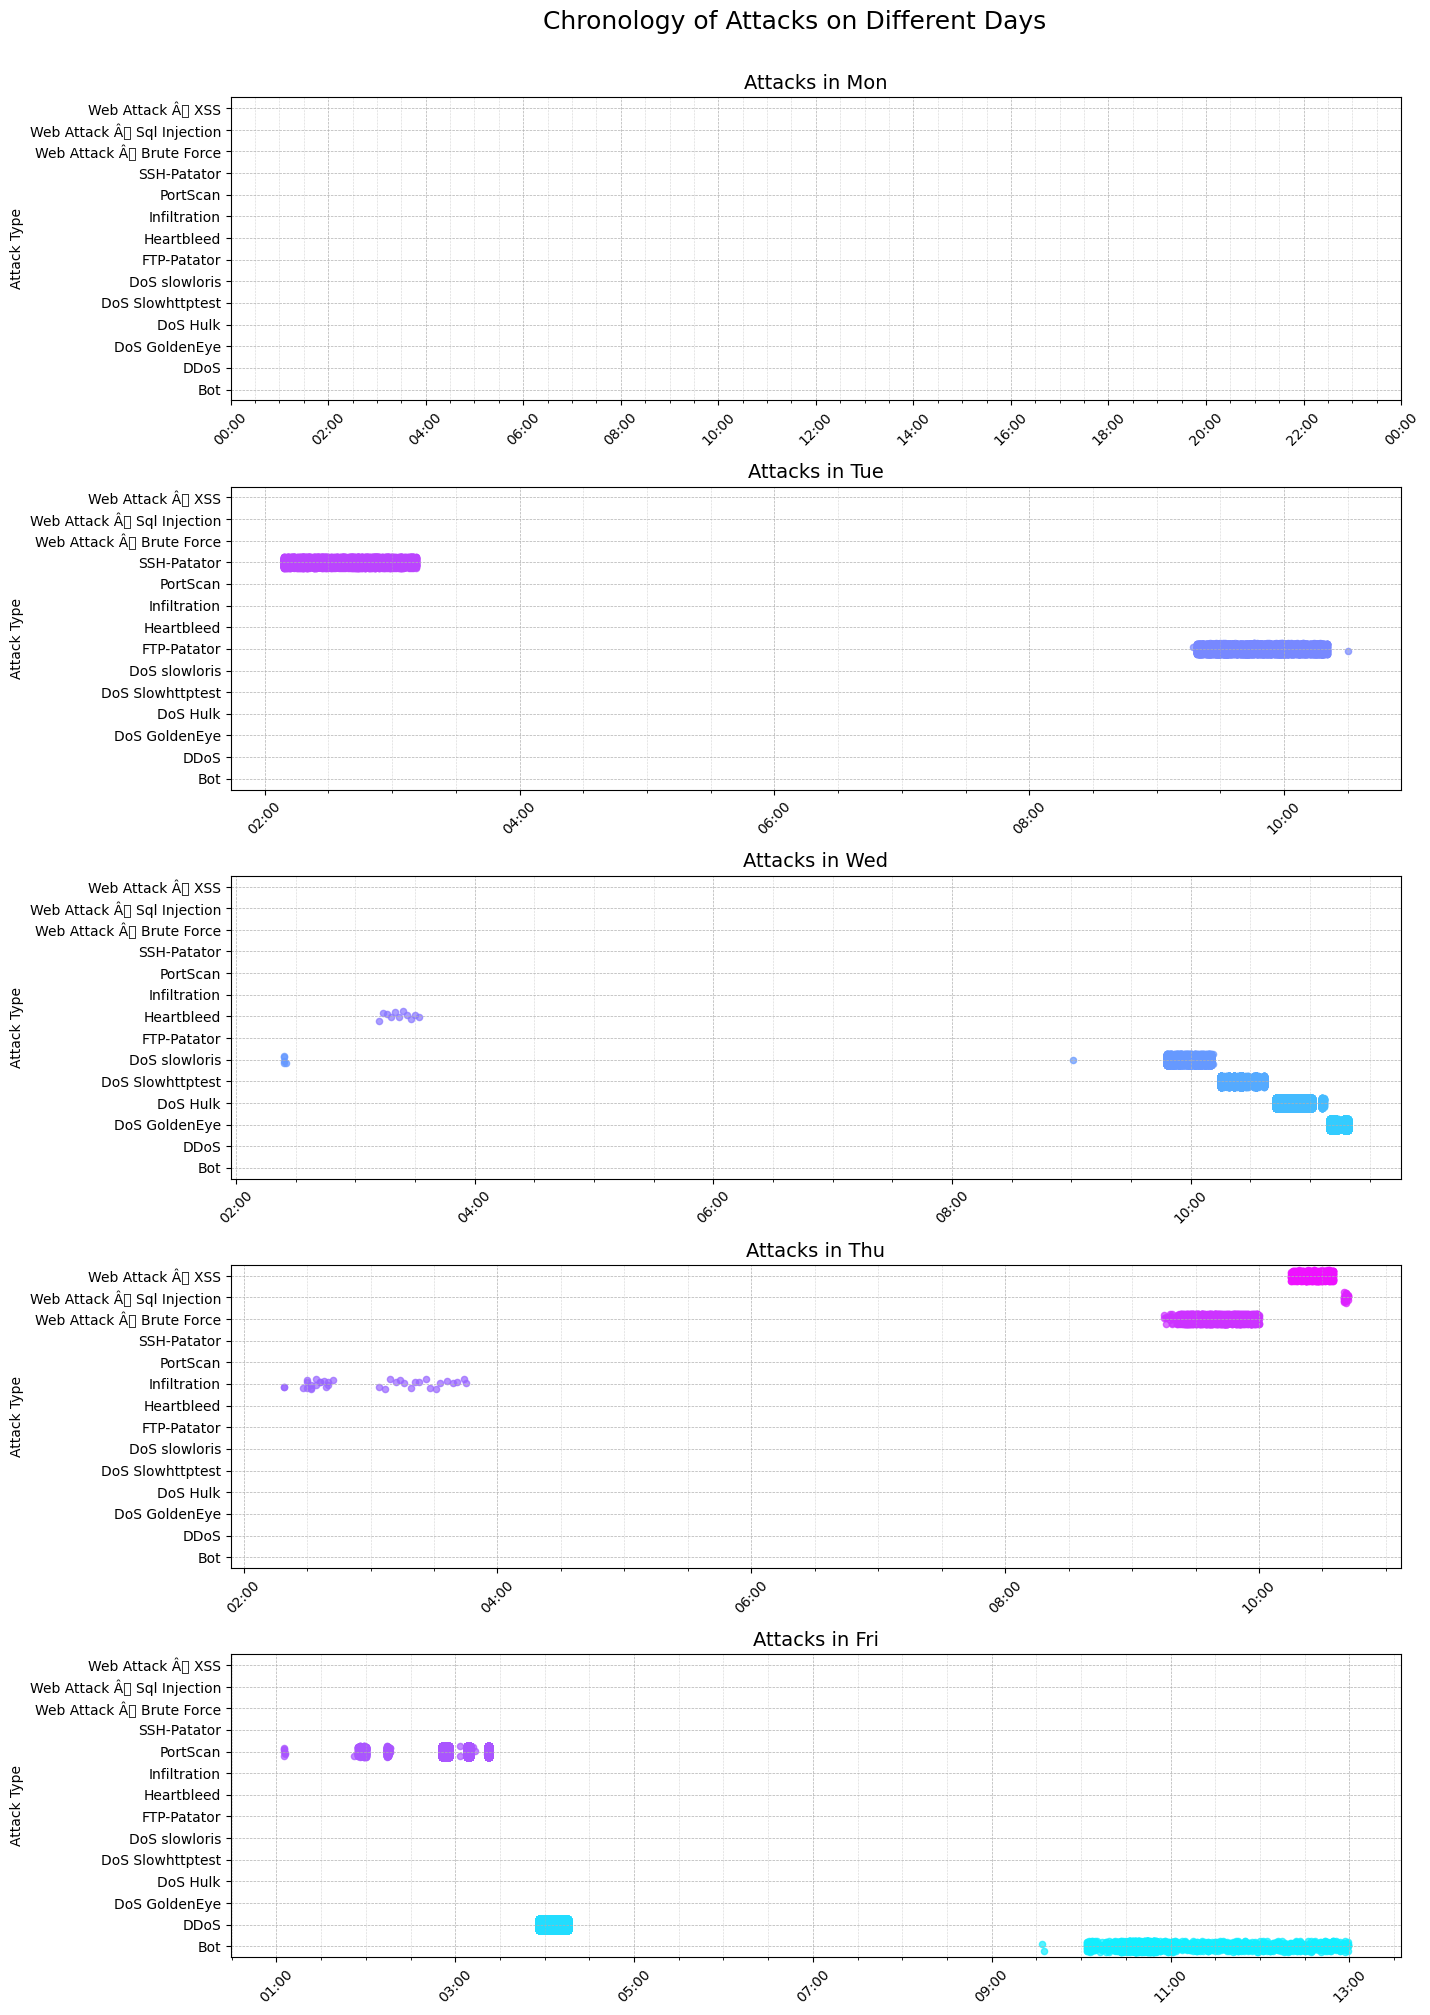

In [4]:
all_labels = set()
for day, path in datasets.items():
    day_df = load_dataset(day)
    day_df = day_df.dropna(subset=['Label'])
    non_benign = day_df[day_df['Label'] != 'BENIGN']
    unique_labels = non_benign['Label'].unique()
    for label in unique_labels:
        all_labels.add(label)

sorted_labels = sorted(list(all_labels))
label_to_y = {}
for i, label in enumerate(sorted_labels):
    label_to_y[label] = i

colors = sns.color_palette('cool', len(sorted_labels))
label_to_color = {}
for label, color in zip(sorted_labels, colors):
    label_to_color[label] = color

fig, axes = plt.subplots(
    nrows=len(datasets),
    ncols=1,
    figsize=(16, 4 * len(datasets)),
    sharex=False,
    sharey=True
)
if len(datasets) == 1:
    axes = [axes]

for i, (day, path) in enumerate(datasets.items()):
    ax = axes[i]
    day_df = load_dataset(day)
    day_df = convert_to_datetime(day_df)
    day_df = day_df.dropna(subset=['Timestamp', 'Label'])
    day_df = day_df[day_df['Label'] != 'BENIGN']

    labels_in_day = day_df['Label'].unique()
    for label in labels_in_day:
        if label in label_to_y:
            subset = day_df[day_df['Label'] == label]
            y_base = label_to_y[label]
            y_jitter = y_base + np.random.uniform(-0.25, 0.25, size=len(subset))

            ax.scatter(
                subset['Timestamp'],
                y_jitter,
                color=label_to_color[label],
                s=20,
                alpha=0.7,
                label=label
            )

    ax.set_yticks(list(range(len(sorted_labels))))
    ax.set_yticklabels(sorted_labels)
    ax.set_ylim(-0.5, len(sorted_labels) - 0.5)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=[0, 30]))
    ax.tick_params(axis='x', rotation=45)

    ax.set_title(f'Attacks in {day}', fontsize=14)
    ax.set_ylabel('Attack Type')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    ax.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.4)

fig.suptitle('Chronology of Attacks on Different Days', fontsize=18, y=1.005)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


### **2 DoS/DDoS attacks**

#### 2.0 Overview

C:\Users\PanHe\AppData\Local\Temp\ipykernel_26424\293805581.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


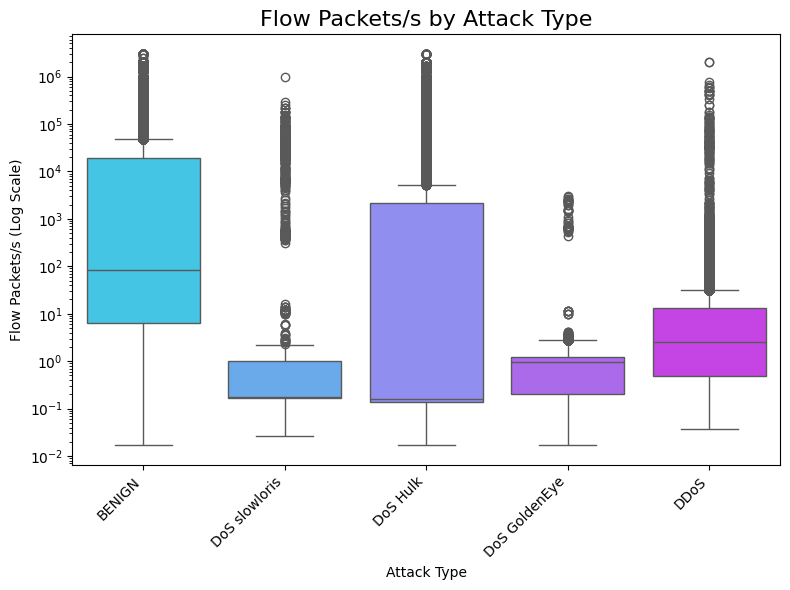

C:\Users\PanHe\AppData\Local\Temp\ipykernel_26424\293805581.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


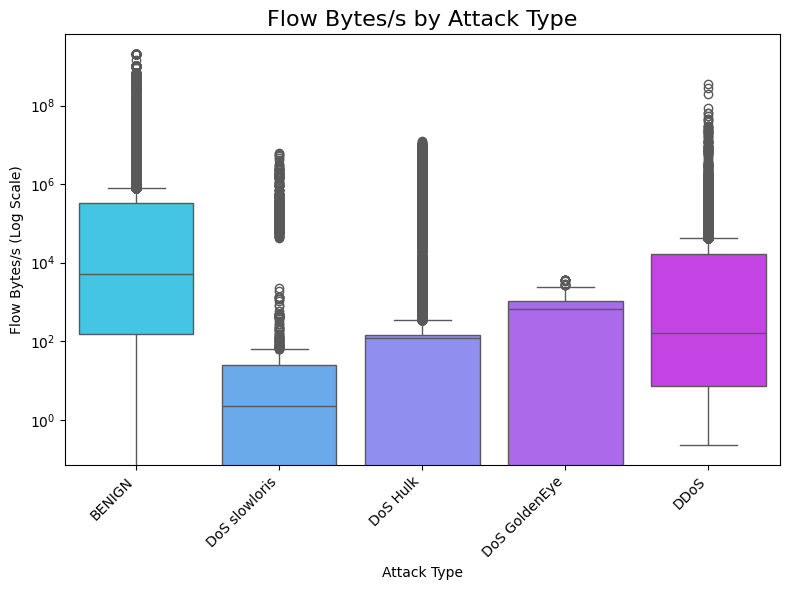

C:\Users\PanHe\AppData\Local\Temp\ipykernel_26424\293805581.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


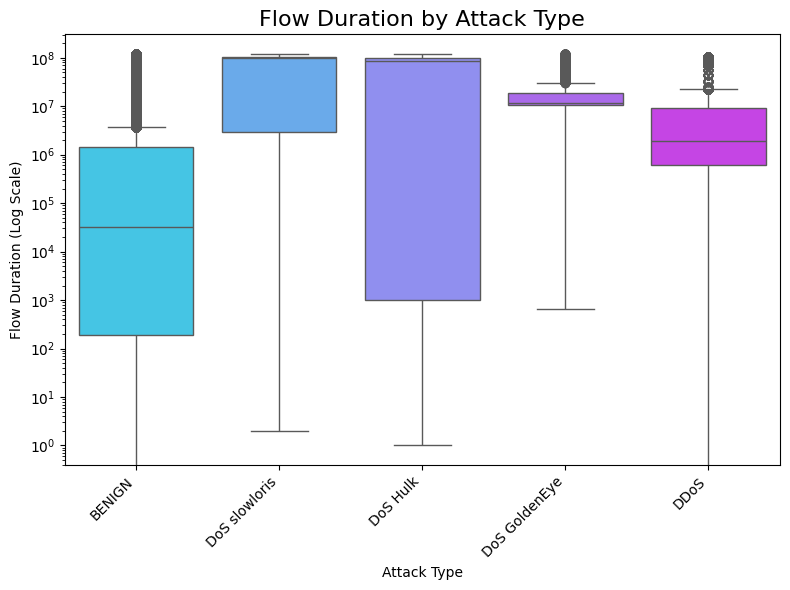

In [ ]:
dos_ddos_attacks = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'DDoS']

df_wed = load_dataset('Wed')
df_wed.columns = df_wed.columns.str.strip()
df_wed = df_wed.dropna()

df_fri3 = load_dataset('Fri')
df_fri3.columns = df_fri3.columns.str.strip()
df_fri3 = df_fri3.dropna()

dos_labels = ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'BENIGN']
df_dos = df_wed[df_wed['Label'].isin(dos_labels)].copy()

ddos_labels = ['DDoS', 'BENIGN']
df_ddos = df_fri3[df_fri3['Label'].isin(ddos_labels)].copy()

dos_ddos_df = pd.concat([df_dos, df_ddos], ignore_index=True)

# Flow Packets/s
plt.figure(figsize=(8, 6))
colors_pkt = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Packets/s',
    data=dos_ddos_df,
    palette=colors_pkt
)
plt.title('Flow Packets/s by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Packets/s (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Flow Bytes/s
plt.figure(figsize=(8, 6))
colors_bytes = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Bytes/s',
    data=dos_ddos_df,
    palette=colors_bytes
)
plt.title('Flow Bytes/s by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Bytes/s (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Flow Duration
plt.figure(figsize=(8, 6))
colors_dur = sns.color_palette('cool', len(dos_ddos_df['Label'].unique()))
sns.boxplot(
    x='Label',
    y='Flow Duration',
    data=dos_ddos_df,
    palette=colors_dur
)
plt.title('Flow Duration by Attack Type', fontsize=16)
plt.yscale('log')
plt.xlabel('Attack Type')
plt.ylabel('Flow Duration (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.1 DoS Slowloris

#### 2.2 DoS SlowHttptest

#### 2.3 DoS Hulk

#### 2.4 DoS GoldenEye

#### 2.5 DDoS

### **3 Port Scan attacks**

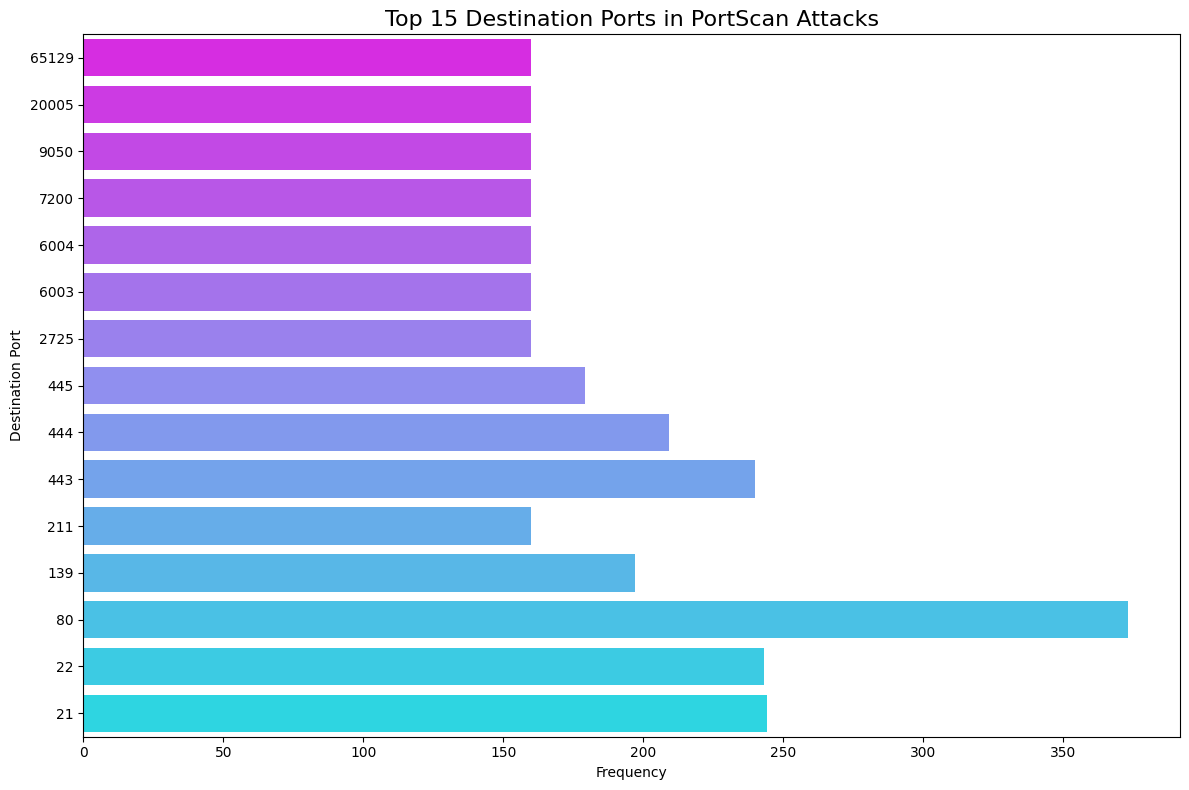

Top 15 targeted ports:

Destination Port
80       373
21       244
22       243
443      240
444      209
139      197
445      179
6003     160
7200     160
65129    160
211      160
9050     160
6004     160
20005    160
2725     160


Count groups (number of ports with the same frequency):
count
373      1
244      1
243      1
240      1
209      1
197      1
179      1
160    327
159    363
158    212
157     68
156     16
155      3
38       1
30       1
6        1
1        1
Unique attacker IP addresses: 1
172.16.0.1


In [31]:
df_fri = load_dataset('Fri')
df_fri.columns = df_fri.columns.str.strip()
df_ps = df_fri[df_fri['Label'] == 'PortScan'].copy()

# Get the value counts for destination ports
port_counts = df_ps['Destination Port'].value_counts()
top_n_ports = 15
top_ports = port_counts.nlargest(top_n_ports)
count_groups = port_counts.value_counts().sort_index(ascending=False)

# Bar chart of top n destination ports
plt.figure(figsize=(12, 8))
colors_ports = sns.color_palette('cool', n_colors=top_n_ports)
sns.barplot(
    x=top_ports.values,
    y=top_ports.index,
    hue=top_ports.index,
    palette=colors_ports,
    orient='h',
    legend=False
)
plt.title(f'Top {top_n_ports} Destination Ports in PortScan Attacks', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Destination Port')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Top {top_n_ports} targeted ports:\n")
print(top_ports.to_string())

print("\n\nCount groups (number of ports with the same frequency):")
print(count_groups.to_string())

ip_addresses = df_ps['Source IP'].unique()
print(f"Unique attacker IP addresses: {len(ip_addresses)}")
for address in ip_addresses:
    print(address)

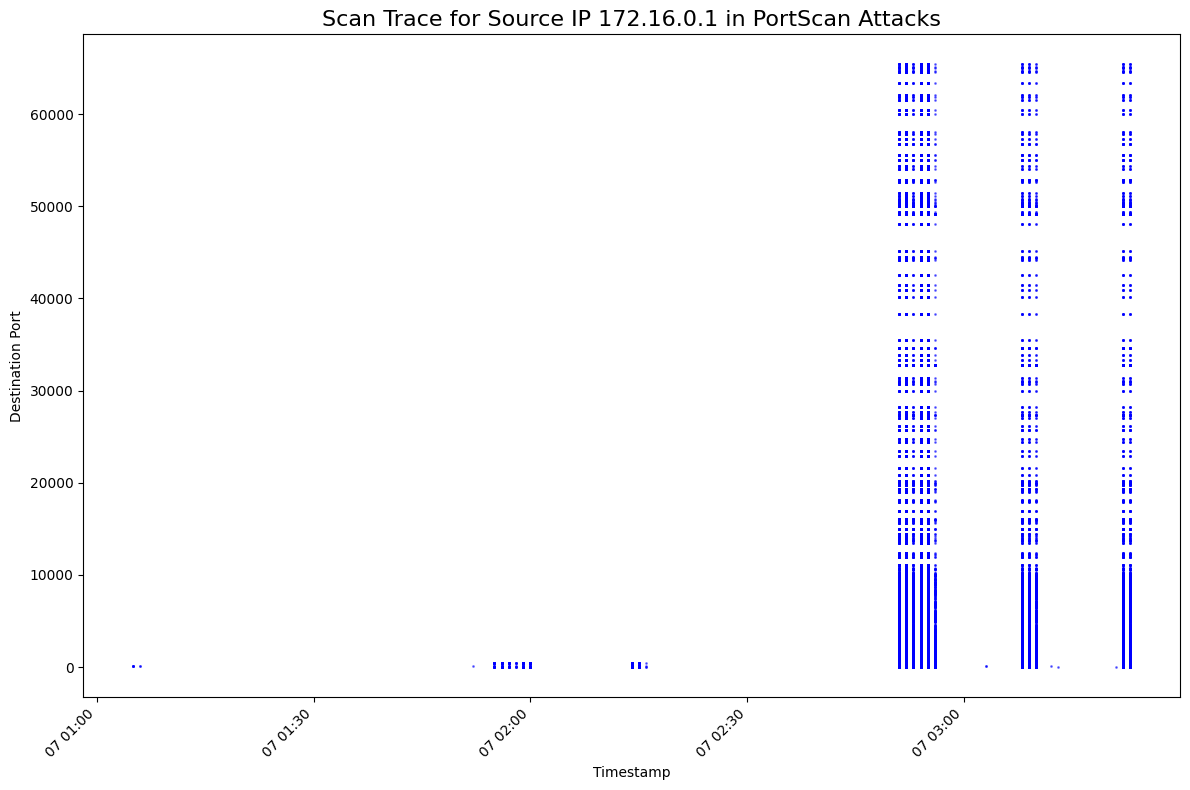

Selected Source IP: 172.16.0.1
Number of scans from this IP: 158930


In [ ]:
df_fri = load_dataset('Fri')
df_fri.columns = df_fri.columns.str.strip()
df_ps = df_fri[df_fri['Label'] == 'PortScan'].copy()

# Select the source IP with the most port scans
most_active_ip = df_ps['Source IP'].value_counts().idxmax()
df_single_ip = df_ps[df_ps['Source IP'] == most_active_ip].copy()
df_single_ip = convert_to_datetime(df_single_ip)

# Scatter plot timestamp vs destination
plt.figure(figsize=(12, 8))
plt.scatter(df_single_ip['Timestamp'], df_single_ip['Destination Port'], s=1, alpha=0.5, color='blue')
plt.title(f'Scan Trace for Source IP {most_active_ip} in PortScan Attacks', fontsize=16)
plt.xlabel('Timestamp')
plt.ylabel('Destination Port')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Selected Source IP: {most_active_ip}")
print(f"Number of scans from this IP: {len(df_single_ip)}")

### **4 Bruteforce attacks**


- Patator FTP
- Patator SSH
- Web Attack - Brute Force

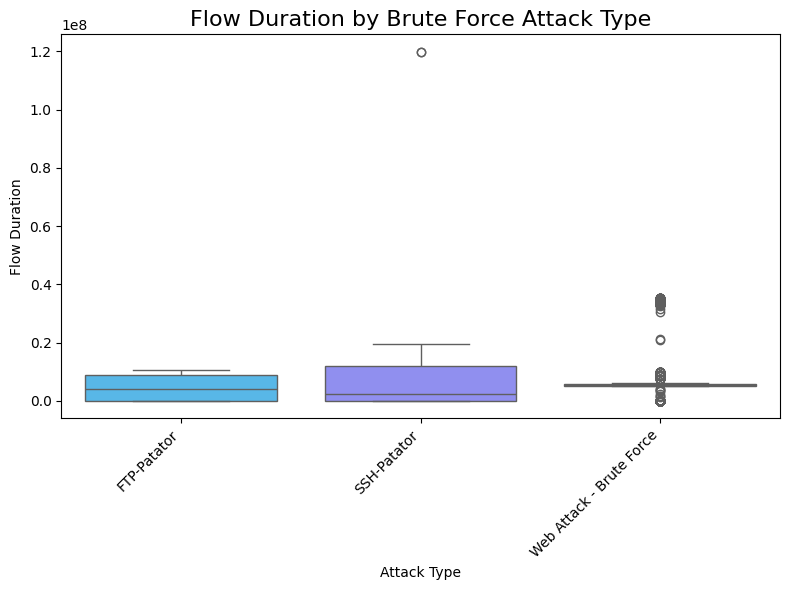

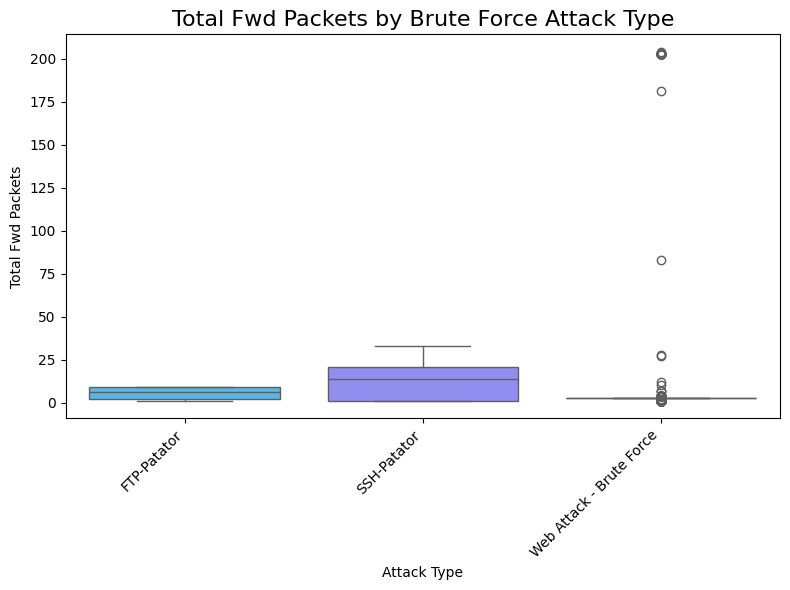

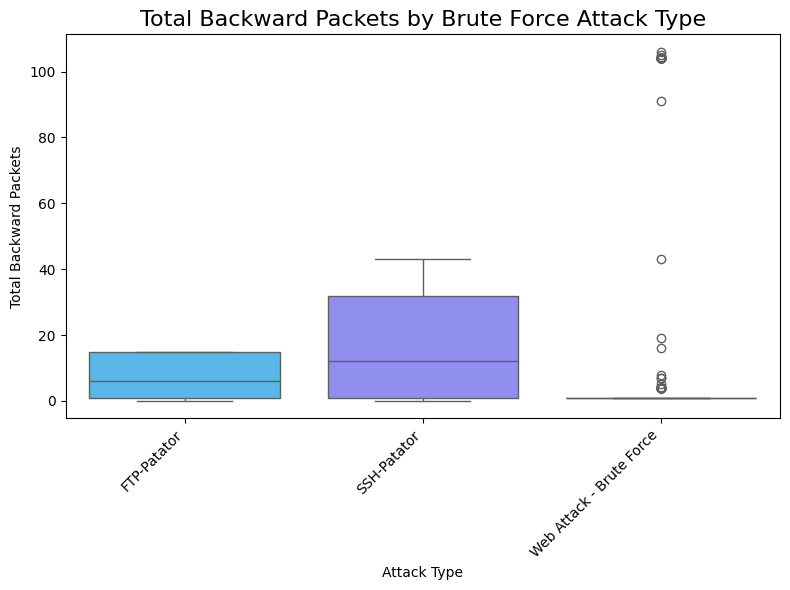

Unique attacker IP addresses: 1
172.16.0.1


In [32]:
df_tue = load_dataset('Tue')
df_thu = load_dataset('Thu')
df_tue_thu = pd.concat([df_tue, df_thu], ignore_index=True)
df_tue_thu.columns = df_tue_thu.columns.str.strip()
brute_labels = ['FTP-Patator', 'SSH-Patator', 'Web Attack - Brute Force']
df_brute = df_tue_thu[df_tue_thu['Label'].isin(brute_labels)].copy()

# Boxplot for flow duration
plt.figure(figsize=(8, 6))
colors_brute = sns.color_palette('cool', len(brute_labels))
sns.boxplot(
    x='Label',
    y='Flow Duration',
    data=df_brute,
    hue='Label',
    palette=colors_brute,
    legend=False
)
plt.title('Flow Duration by Brute Force Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Flow Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot for total forward packets
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Label',
    y='Total Fwd Packets',
    data=df_brute,
    hue='Label',
    palette=colors_brute,
    legend=False
)
plt.title('Total Fwd Packets by Brute Force Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Fwd Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot for total backward packets
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Label',
    y='Total Backward Packets',
    data=df_brute,
    hue='Label',
    palette=colors_brute,
    legend=False
)
plt.title('Total Backward Packets by Brute Force Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Backward Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ip_addresses = df_brute['Source IP'].unique()
print(f"Unique attacker IP addresses: {len(ip_addresses)}")
for address in ip_addresses:
    print(address)

### **5 Bot attacks**

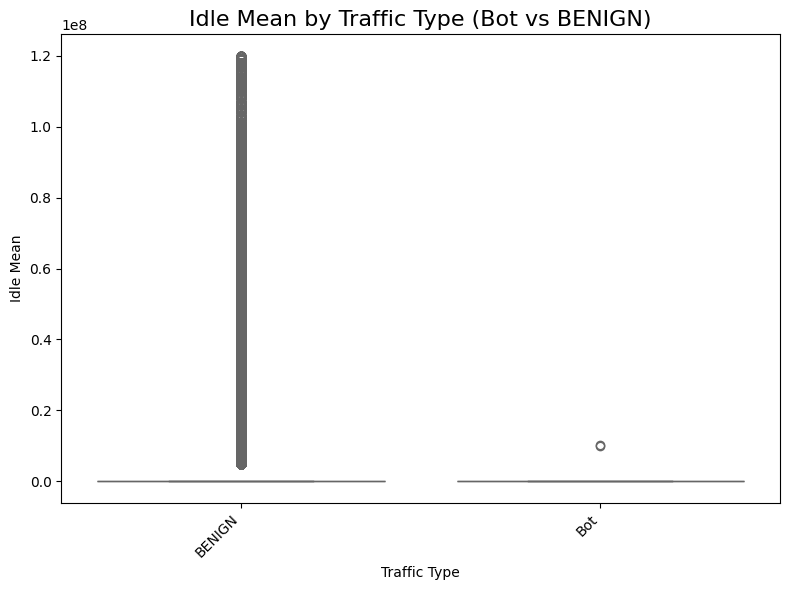

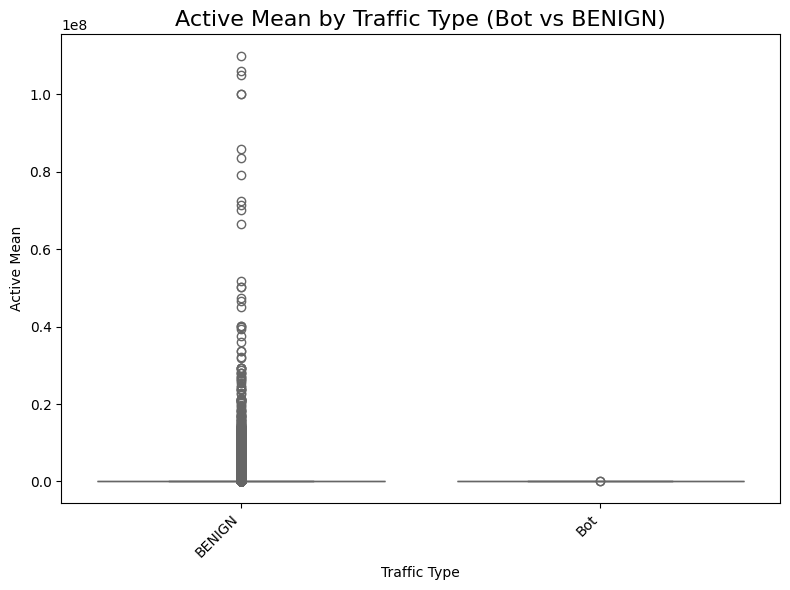

Unique source IP addresses in Bot traffic: 7098
192.168.10.50
8.6.0.1
192.168.10.9
192.168.10.3
192.168.10.25
192.168.10.14
192.168.10.5
192.168.10.51
192.168.10.8
192.168.10.17
64.4.27.50
13.78.188.147
64.4.54.254
220.243.219.55
72.21.91.29
52.10.50.117
52.84.145.172
65.152.202.208
13.82.187.188
64.4.54.36
134.170.51.247
23.15.4.8
52.11.17.245
52.36.207.192
35.165.158.113
23.36.33.93
210.157.19.63
206.126.112.141
172.217.10.238
104.16.27.216
35.167.184.4
35.164.51.247
69.89.74.100
52.84.3.76
52.84.145.248
184.84.243.218
184.84.243.202
216.58.219.206
52.11.31.31
52.43.87.30
23.199.172.161
104.97.95.20
8.253.154.120
23.15.4.24
157.240.18.19
157.240.18.35
23.203.252.93
104.27.214.30
104.27.215.30
172.217.3.106
104.17.61.91
104.19.196.102
172.217.10.104
40.77.228.69
192.124.249.5
172.217.12.206
80.247.66.26
64.4.54.18
52.40.81.184
65.55.138.126
23.194.182.93
52.84.140.85
52.84.140.31
52.43.9.103
23.194.182.11
104.20.170.20
72.5.205.53
199.193.119.50
52.84.145.242
72.5.205.62
23.50.75.27
2

In [4]:
df_fri = load_dataset('Fri')
df_fri.columns = df_fri.columns.str.strip()
bot_labels = ['Bot', 'BENIGN']
df_bot = df_fri[df_fri['Label'].isin(bot_labels)].copy()

# Boxplot for Idle Mean
plt.figure(figsize=(8, 6))
colors_bot = sns.color_palette('cool', len(bot_labels))
sns.boxplot(
    x='Label',
    y='Idle Mean',
    data=df_bot,
    hue='Label',
    palette=colors_bot,
    legend=False
)
plt.title('Idle Mean by Traffic Type (Bot vs BENIGN)', fontsize=16)
plt.xlabel('Traffic Type')
plt.ylabel('Idle Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot for Active Mean
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Label',
    y='Active Mean',
    data=df_bot,
    hue='Label',
    palette=colors_bot,
    legend=False
)
plt.title('Active Mean by Traffic Type (Bot vs BENIGN)', fontsize=16)
plt.xlabel('Traffic Type')
plt.ylabel('Active Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ip_addresses = df_bot['Source IP'].unique()
print(f"Unique source IP addresses in Bot traffic: {len(ip_addresses)}")
for address in ip_addresses:
    print(address)

### **6 Web exploitation**

- Web Attack - XSS
- Web Attack - SQL Injection
- Heartbleed

C:\Users\PanHe\AppData\Local\Temp\ipykernel_1940\1352533532.py:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(


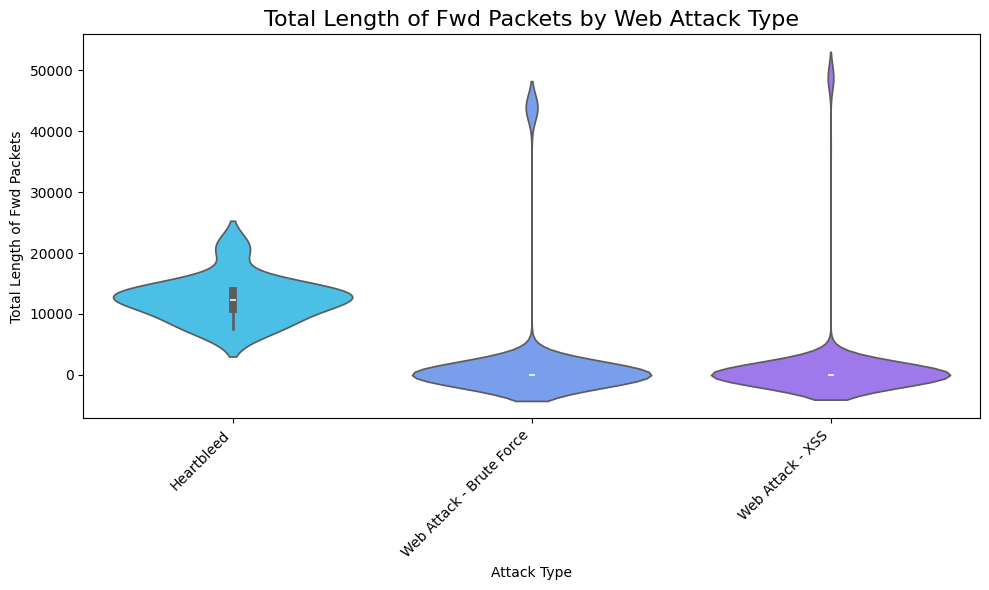

C:\Users\PanHe\AppData\Local\Temp\ipykernel_1940\1352533532.py:26: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(


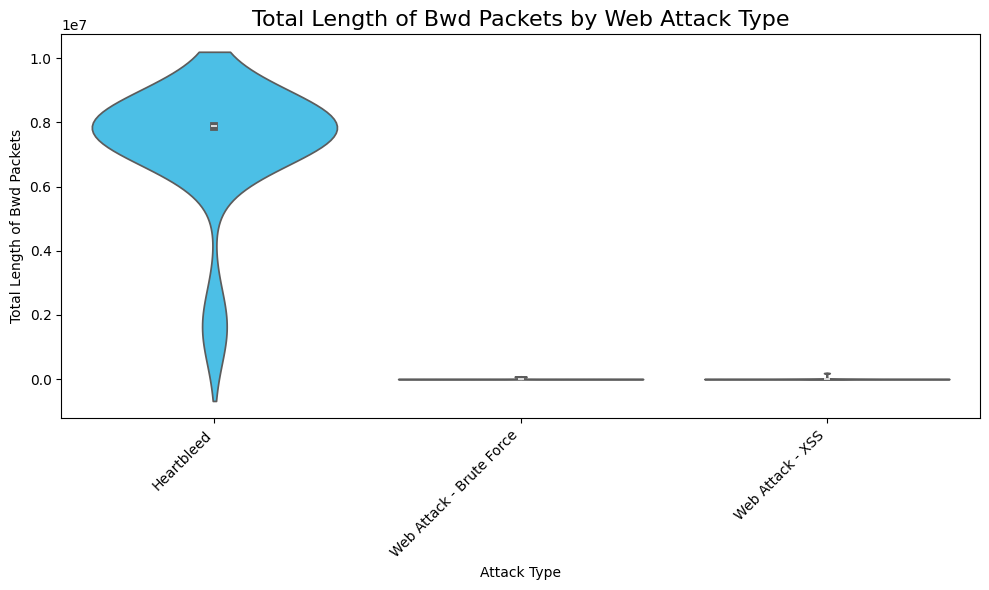

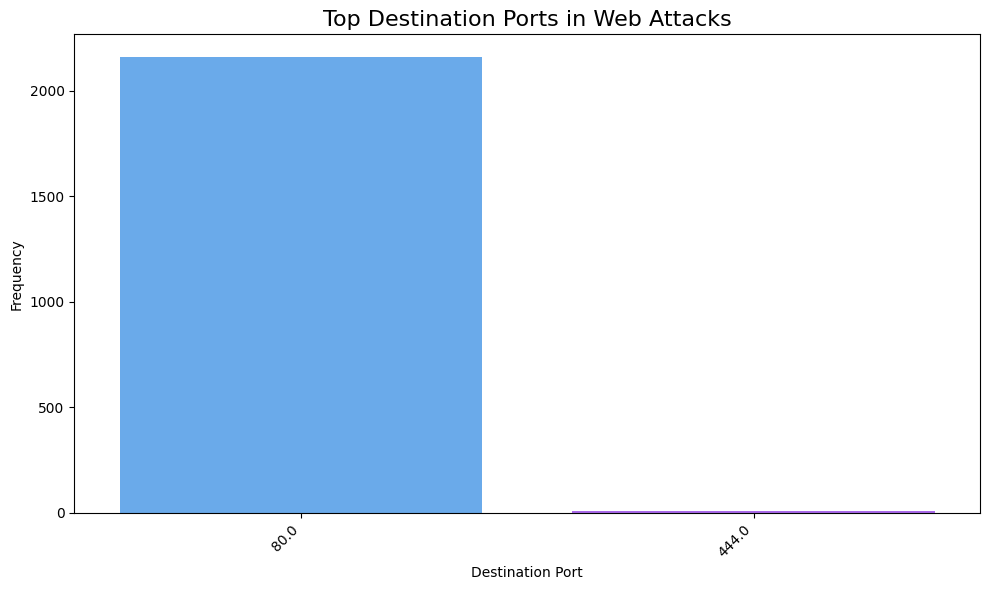

Top destination ports in web attacks:
Destination Port
80.0     2159
444.0      11


In [6]:
df_full = load_full_dataset()
df_full.columns = df_full.columns.str.strip()
web_labels = ['Web Attack - SQL Injection', 'Web Attack - XSS', 'Web Attack - Brute Force', 'Heartbleed']
df_web = df_full[df_full['Label'].isin(web_labels)].copy()

# Violin plot for Total Length of Fwd Packets
plt.figure(figsize=(10, 6))
colors_web = sns.color_palette('cool', len(web_labels))
sns.violinplot(
    x='Label',
    y='Total Length of Fwd Packets',
    data=df_web,
    hue='Label',
    palette=colors_web,
    legend=False
)
plt.title('Total Length of Fwd Packets by Web Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Length of Fwd Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Violin plot for Total Length of Bwd Packets
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Label',
    y='Total Length of Bwd Packets',
    data=df_web,
    hue='Label',
    palette=colors_web,
    legend=False
)
plt.title('Total Length of Bwd Packets by Web Attack Type', fontsize=16)
plt.xlabel('Attack Type')
plt.ylabel('Total Length of Bwd Packets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar chart of Destination Ports
top_ports = df_web['Destination Port'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
colors_ports = sns.color_palette('cool', n_colors=len(top_ports))
sns.barplot(
    x=top_ports.index.astype(str),
    y=top_ports.values,
    hue=top_ports.index.astype(str),
    palette=colors_ports,
    legend=False
)
plt.title('Top Destination Ports in Web Attacks', fontsize=16)
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top destination ports in web attacks:")
print(top_ports.to_string())

### **7 Infiltration**

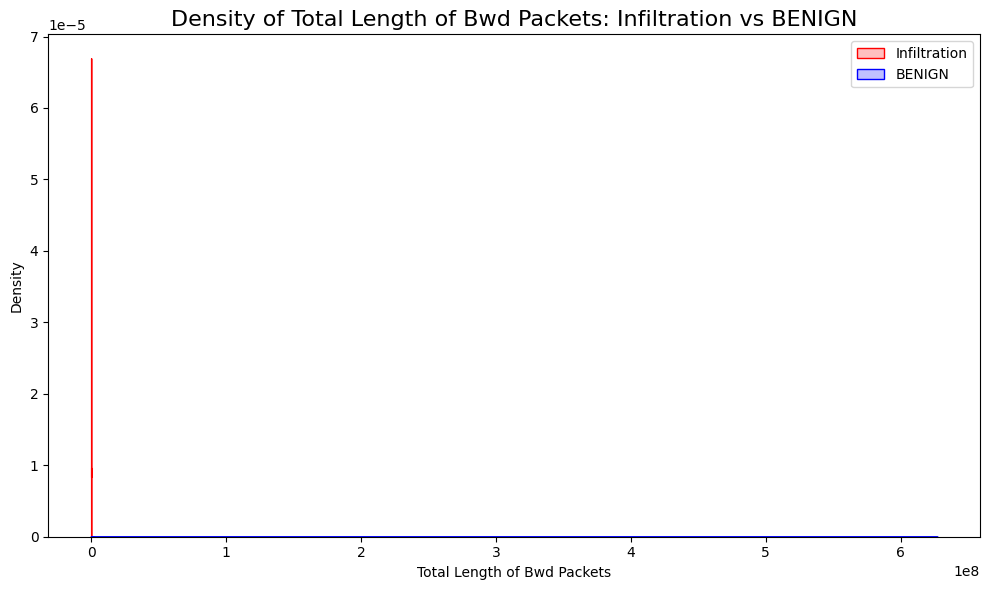

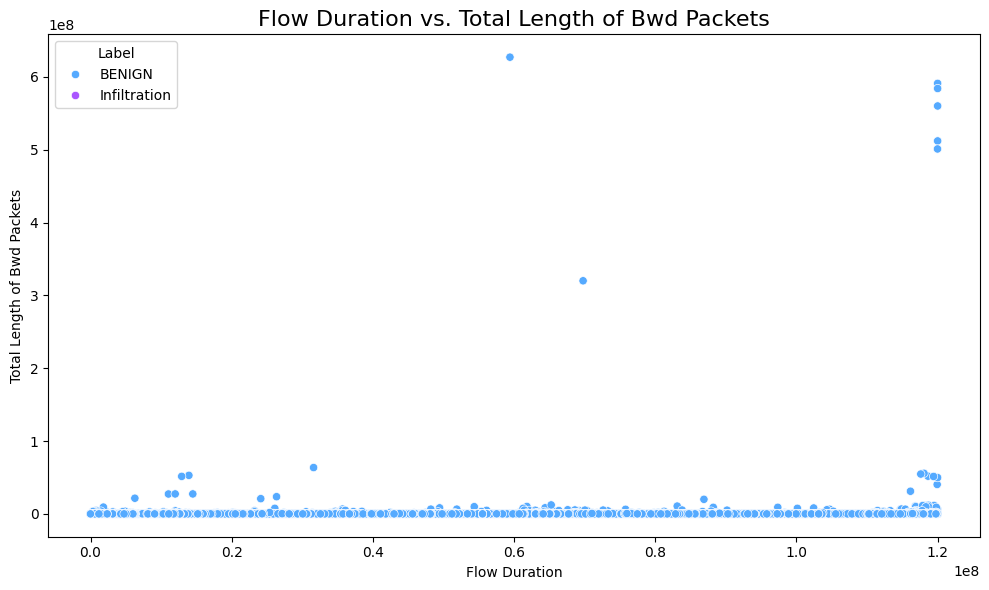

In [35]:
df_thu = load_dataset('Thu')
df_thu.columns = df_thu.columns.str.strip()
inf_labels = ['Infiltration', 'BENIGN']
df_inf = df_thu[df_thu['Label'].isin(inf_labels)].copy()

# Overlaid Density Plots for Total Length of Bwd Packets
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_inf[df_inf['Label'] == 'Infiltration'],
    x='Total Length of Bwd Packets',
    label='Infiltration',
    fill=True,
    color='red'
)
sns.kdeplot(
    data=df_inf[df_inf['Label'] == 'BENIGN'],
    x='Total Length of Bwd Packets',
    label='BENIGN',
    fill=True,
    color='blue'
)
plt.title('Density of Total Length of Bwd Packets: Infiltration vs BENIGN', fontsize=16)
plt.xlabel('Total Length of Bwd Packets')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Scatter Plot of Flow Duration vs. Total Length of Bwd Packets
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_inf,
    x='Flow Duration',
    y='Total Length of Bwd Packets',
    hue='Label',
    palette='cool'
)
plt.title('Flow Duration vs. Total Length of Bwd Packets', fontsize=16)
plt.xlabel('Flow Duration')
plt.ylabel('Total Length of Bwd Packets')
plt.tight_layout()
plt.show()